In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-12 01:07:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-12 01:07:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-12 01:07:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)


(300, 100, 100)


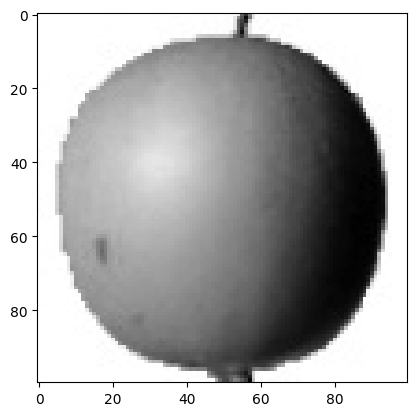

In [10]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()
# 밝은 부분이 0이고 짙은 부분이 255에 가까움

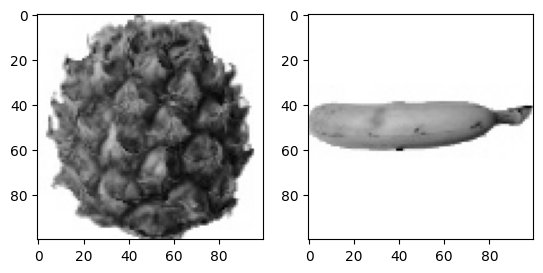

In [12]:
fig,axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')

In [14]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


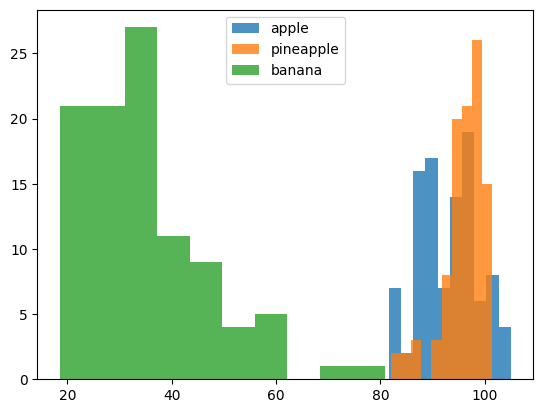

In [16]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()

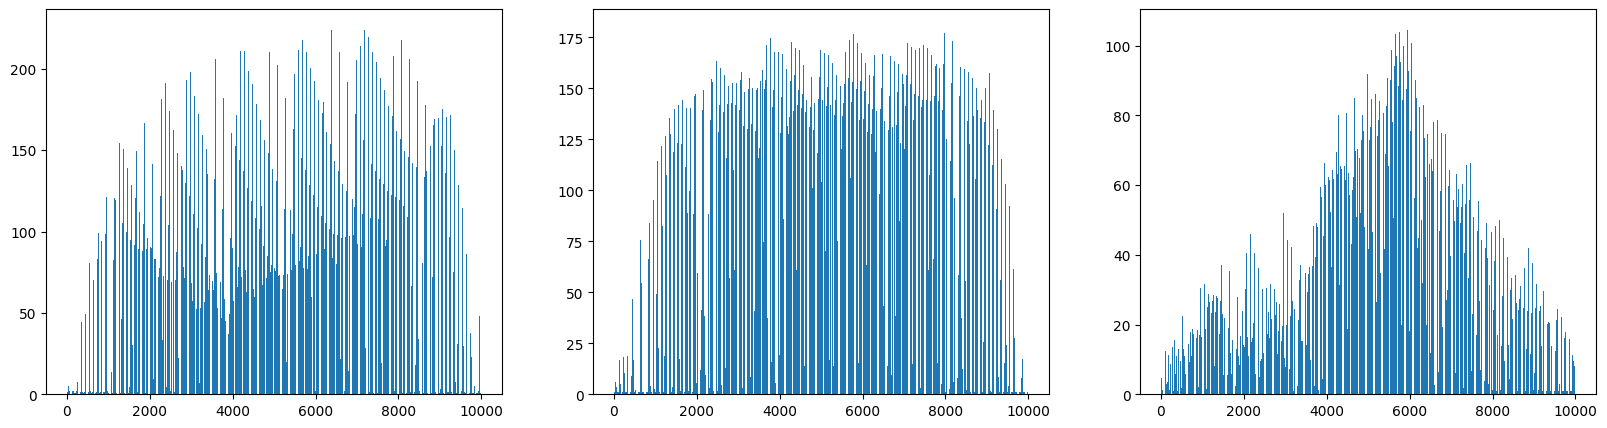

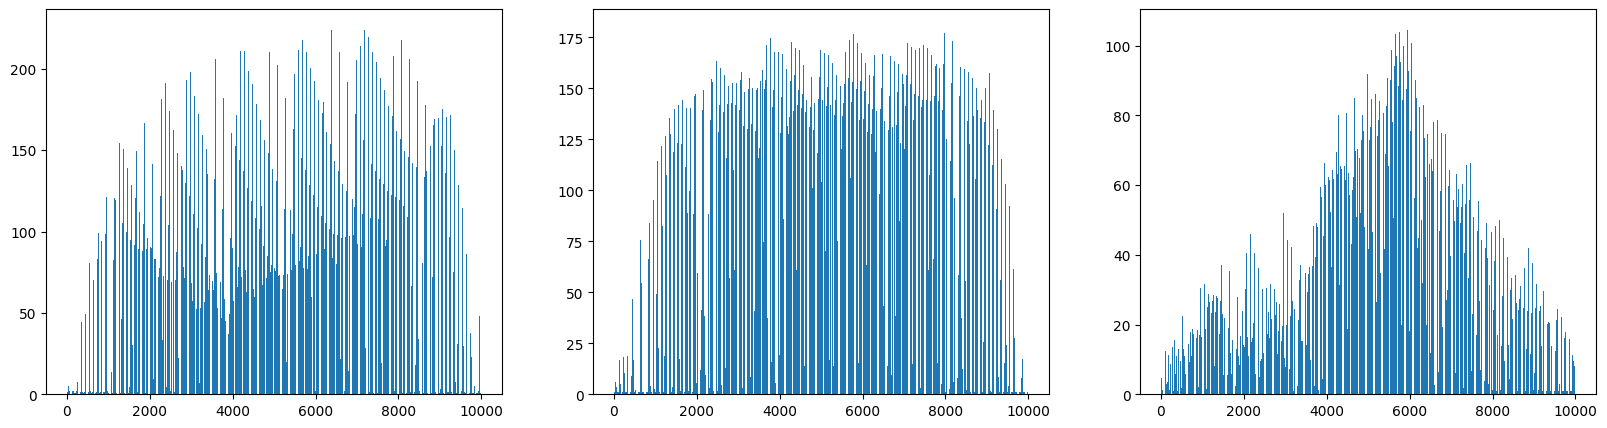

In [17]:
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()


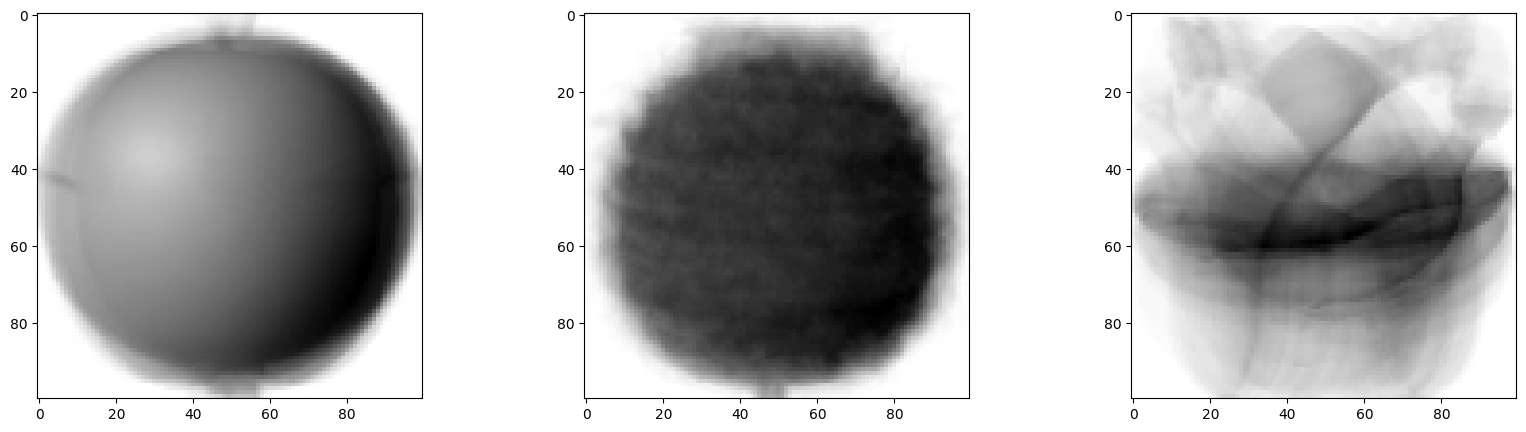

In [20]:
apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [22]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = abs_diff.mean(axis=(1,2))
print(abs_mean.shape)

(300,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

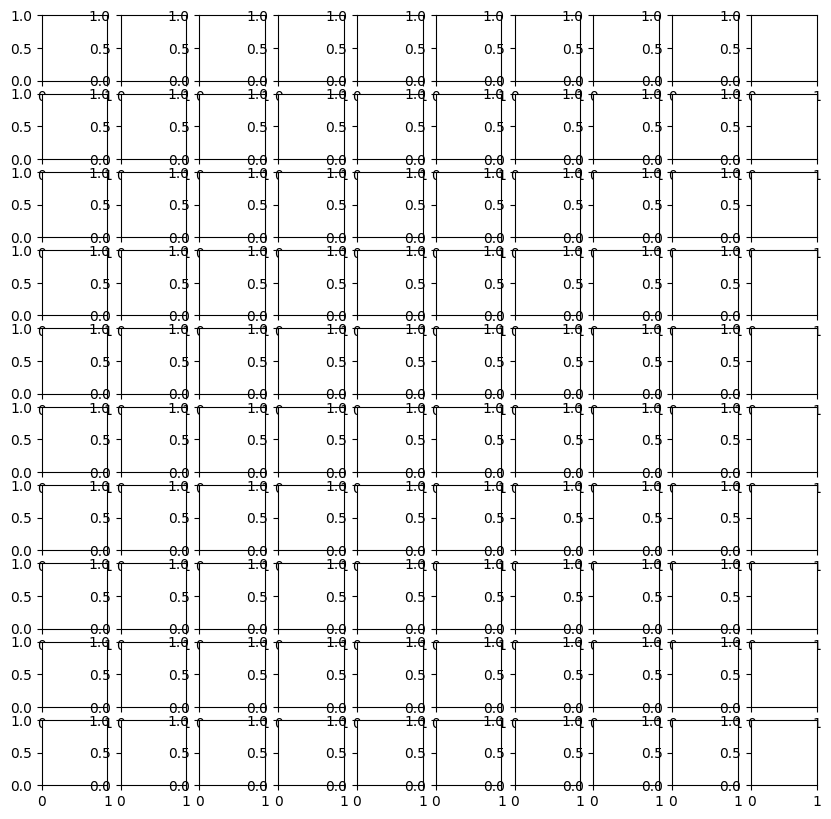

In [25]:
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10,10)
fig.axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i,j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()